In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv("../package/data/feature_metadata.csv")    

In [3]:
df.head()

,id_,n_bedroons,n_bathrooms,area,zipcode,price,bedroom,bathroom,kitchen,frontal
0,1,4.0,4.0,4053.0,85255.0,869500.0,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...
1,2,4.0,3.0,3343.0,36372.0,865200.0,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...
2,3,3.0,4.0,3923.0,85266.0,889000.0,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...
3,4,5.0,5.0,4022.0,85262.0,910000.0,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...
4,5,3.0,4.0,4116.0,85266.0,971226.0,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...,C:/Users/manue/projects/HOUSES-DATASET/Houses ...


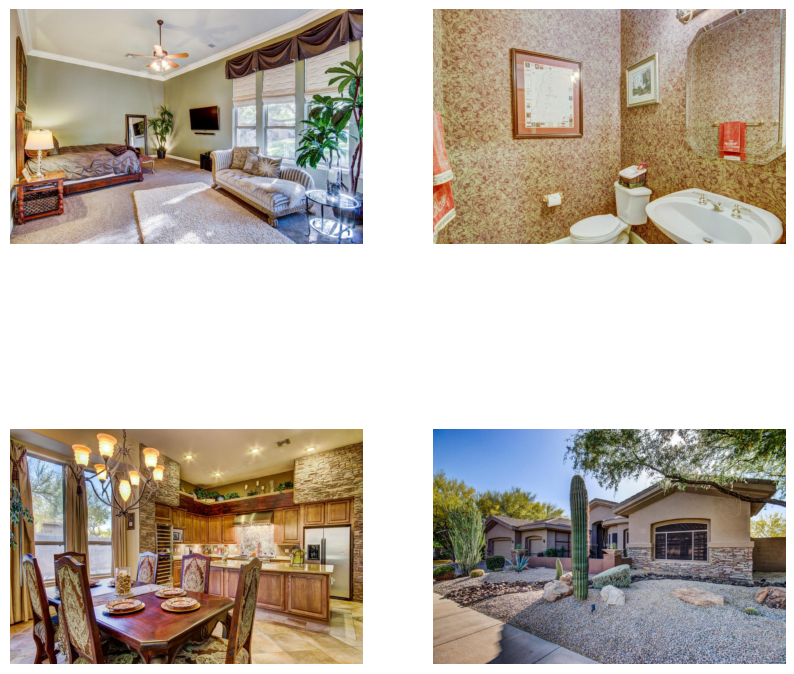

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

bedroom_image_path = df.loc[0, "bedroom"]
bathroom_image_path = df.loc[0, "bathroom"]
kitchen_image_path = df.loc[0, "kitchen"]
frontal_image_path = df.loc[0, "frontal"]
# Read the image using matplotlib

f, axarr = plt.subplots(2, 2, figsize=(10, 10))
# Read the images
img_bedroom = mpimg.imread(bedroom_image_path)
img_bathroom = mpimg.imread(bathroom_image_path)
img_kitchen = mpimg.imread(kitchen_image_path)
img_frontal = mpimg.imread(frontal_image_path)

# Display the images in a 2x2 grid
axarr[0, 0].imshow(img_bedroom)
axarr[0, 0].axis('off')  # Turn off axis

axarr[0, 1].imshow(img_bathroom)
axarr[0, 1].axis('off')  # Turn off axis

axarr[1, 0].imshow(img_kitchen)
axarr[1, 0].axis('off')  # Turn off axis

axarr[1, 1].imshow(img_frontal)
axarr[1, 1].axis('off')  # Turn off axis
plt.show()

In [5]:
import keras 
from keras import Model


def make_simple_model(input_shape):
    """
    Create a simple Keras model for the given input and output shapes.

    Args:
        input_shape (tuple): Shape of the input data.
        output_shape (tuple): Shape of the output data.

    Returns:
        keras.Sequential: A Keras Sequential model.
    """
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Flatten()(inputs)
    
    x = keras.layers.Dense(16, activation='relu')(x)
    x = keras.layers.Dense(8, activation='relu')(x)
    x = keras.layers.Dense(4, activation='relu')(x)

    outputs = keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

def make_image_processor(input_shape, output_shape):
    """
    Create a Keras image processor for the given input and output shapes.

    Args:
        input_shape (tuple): Shape of the input images.
        output_shape (tuple): Shape of the output images.

    Returns:
        keras.Sequential: A Keras Sequential model for image processing.
    """

    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Rescaling(1./255)(inputs)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(32, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(16, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(8, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(4, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

In [6]:
bedroom_model = make_image_processor((128, 128, 3),16)
bathroom_model = make_image_processor((128, 128, 3), 16)
kitchen_model = make_image_processor((128, 128, 3), 16)
frontal_model = make_image_processor((128, 128, 3), 16)
textual_model = make_simple_model((4,))


In [7]:
from keras.layers import Concatenate

# Get the outputs of the models
bedroom_output = bedroom_model.output
bathroom_output = bathroom_model.output
kitchen_output = kitchen_model.output
frontal_output = frontal_model.output
textual_output = textual_model.output

# Concatenate the outputs
merged = Concatenate()([bedroom_output, bathroom_output, kitchen_output, frontal_output, textual_output])

In [8]:
# Add dense layers after the merged output
x = keras.layers.Dense(256, activation='relu')(merged)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)

# Final output layer
final_output = keras.layers.Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=[bedroom_model.input, bathroom_model.input, kitchen_model.input, frontal_model.input, textual_model.input], outputs=final_output)

In [9]:
from tensorflow.keras.utils import plot_model


In [10]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
